# Image Segmentation with OpenCV

In [15]:
import cv2
import numpy as np
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
OPENPOSE_ROOT = '/home/albert/openpose/'

img_file = OPENPOSE_ROOT + 'examples/media/albert/woman.jpg'
pose_file = OPENPOSE_ROOT + 'examples/media/albert/pose/woman_keypoints.json'
render_file = OPENPOSE_ROOT + 'examples/media/albert/render/woman_rendered.png'

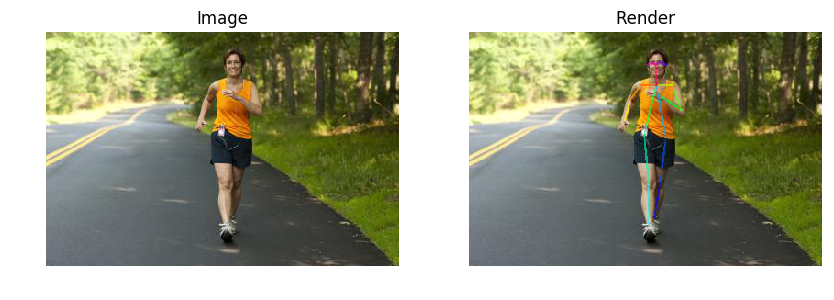

In [3]:
img = misc.imread(img_file) # cv2.imread() outputs different data for some reason?
render = misc.imread(render_file)

plt.figure(figsize=(10,6), dpi=100)

plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Image')

plt.subplot(122)
plt.imshow(render)
plt.axis('off')
plt.title('Render')

plt.show()

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# http://docs.opencv.org/3.2.0/d7/d4d/tutorial_py_thresholding.html
# retVal represents threshold value (equals inputted threshold if not using Otsu)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

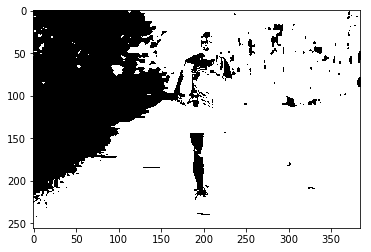

In [5]:
plt.imshow(thresh, cmap=plt.cm.gray)

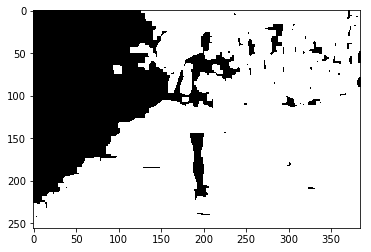

In [6]:
# noise removal
kernel = np.ones((3,3),np.uint8)
# http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening, cmap=plt.cm.gray)

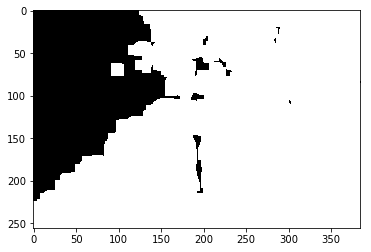

In [7]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, cmap=plt.cm.gray)

In [37]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# plt.imshow(dist_transform, cmap=plt.cm.gray)
# plt.show()
# plt.imshow(cv2.distanceTransform(opening,cv2.DIST_L2,0), cmap=plt.cm.gray)
# plt.show()
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [38]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

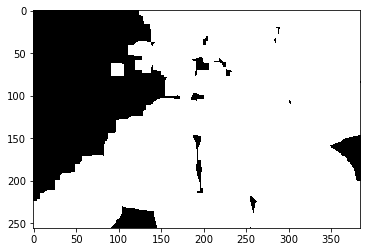

In [39]:
plt.imshow(unknown, cmap=plt.cm.gray)

In [40]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

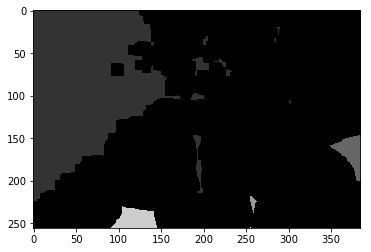

In [41]:
# Dark blue = unknown regions
# Colored = sure regions
plt.imshow(markers, cmap=plt.cm.gray)

In [42]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

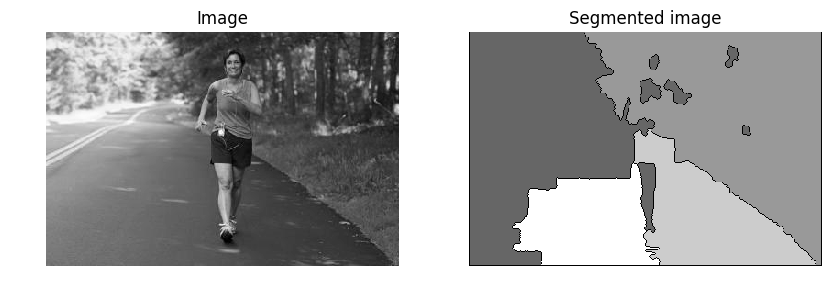

In [45]:
plt.figure(figsize=(10,6), dpi=100)

plt.subplot(121)
plt.imshow(gray, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image')

plt.subplot(122)
plt.imshow(markers, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Segmented image')

plt.show()